In [16]:
import pandas as pd

In [17]:
data = {'employee': ['Caesar', 'Michael Jackson', 'Mike Tyson', 'Chris Brown', 'Drake', 'Naymar', 'Zidane', 'Firmino', 'Salah', 'Alexander', 'Demoses', 'Ava', 'Beyonce'],
        'gender': ['Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female'],
        'salary': [40000, 32000, 45000, 54000, 72000, 62000, 92000, 55000, 60000, 99000, 35000, 48000, 35000],
        'department':['Finance', 'Finance', 'Legal', 'Legal', 'IT', 'IT', 'Marketing', 'Administration', 'IT', 'IT', 'Security', 'HR', 'HR'],
        'country' : ['USA', 'Brazil', 'Italy', 'USA', 'USA', 'Brazil', 'Tanzania', 'Kenya', 'Uganda', 'Spain', 'Spain', 'USA', 'USA']}  

In [18]:
df = pd.DataFrame(data)

In [19]:
df.head()

,employee,gender,salary,department,country
0,Caesar,Male,40000,Finance,USA
1,Michael Jackson,Male,32000,Finance,Brazil
2,Mike Tyson,Male,45000,Legal,Italy
3,Chris Brown,Male,54000,Legal,USA
4,Drake,Male,72000,IT,USA


In [20]:
column_names = list(df.columns)
print(column_names)

['employee', 'gender', 'salary', 'department', 'country']


In [21]:
# Selecting maximun salary
max_salary = df['salary'].max()
max_salary

99000

In [22]:
# Selecting employee with maximum salary
df.loc[df['salary'] == max_salary]

,employee,gender,salary,department,country
9,Alexander,Male,99000,IT,Spain


In [23]:
# Selecting minimum salary
min_salary = df['salary'].min()
min_salary

32000

In [24]:
# Selecting employee with minimum salary
df.loc[df['salary'] == min_salary]

,employee,gender,salary,department,country
1,Michael Jackson,Male,32000,Finance,Brazil


In [25]:
# Employees from USA
df[df['country'].isin(['USA'])]

,employee,gender,salary,department,country
0,Caesar,Male,40000,Finance,USA
3,Chris Brown,Male,54000,Legal,USA
4,Drake,Male,72000,IT,USA
11,Ava,Female,48000,HR,USA
12,Beyonce,Female,35000,HR,USA


In [27]:
# Employees who works for HR and IT department
df[df['department'].isin(['HR', 'IT'])]

,employee,gender,salary,department,country
4,Drake,Male,72000,IT,USA
5,Naymar,Male,62000,IT,Brazil
8,Salah,Male,60000,IT,Uganda
9,Alexander,Male,99000,IT,Spain
11,Ava,Female,48000,HR,USA
12,Beyonce,Female,35000,HR,USA


In [29]:
# Selecting a row based on multiple matched columns
df[df['department'].isin(['HR', 'IT']) & df['country'].isin(['USA'])]

,employee,gender,salary,department,country
4,Drake,Male,72000,IT,USA
11,Ava,Female,48000,HR,USA
12,Beyonce,Female,35000,HR,USA


In [30]:
# Employee with salary greater than 40000
df.loc[df['salary'] > 40000]

,employee,gender,salary,department,country
2,Mike Tyson,Male,45000,Legal,Italy
3,Chris Brown,Male,54000,Legal,USA
4,Drake,Male,72000,IT,USA
5,Naymar,Male,62000,IT,Brazil
6,Zidane,Male,92000,Marketing,Tanzania
7,Firmino,Male,55000,Administration,Kenya
8,Salah,Male,60000,IT,Uganda
9,Alexander,Male,99000,IT,Spain
11,Ava,Female,48000,HR,USA


In [32]:
# Employees who works for HR, IT fromm USA and have salary higher than 40000
data = df[df['department'].isin(['HR', 'IT']) & df['country'].isin(['USA'])]
data.loc[df['salary'] > 40000]

,employee,gender,salary,department,country
4,Drake,Male,72000,IT,USA
11,Ava,Female,48000,HR,USA


In [33]:
# Showing unique country
df['country'].unique()

array(['USA', 'Brazil', 'Italy', 'Tanzania', 'Kenya', 'Uganda', 'Spain'],
      dtype=object)

In [34]:
df.groupby(['country']).count()

,employee,gender,salary,department
country,,,,
Brazil,2,2,2,2
Italy,1,1,1,1
Kenya,1,1,1,1
Spain,2,2,2,2
Tanzania,1,1,1,1
USA,5,5,5,5
Uganda,1,1,1,1


In [35]:
df.groupby(['gender']).count()

,employee,salary,department,country
gender,,,,
Female,2,2,2,2
Male,11,11,11,11


In [36]:
df.groupby(['department']).count()

,employee,gender,salary,country
department,,,,
Administration,1,1,1,1
Finance,2,2,2,2
HR,2,2,2,2
IT,4,4,4,4
Legal,2,2,2,2
Marketing,1,1,1,1
Security,1,1,1,1


In [37]:
departments = df.groupby(['department']).size()

In [38]:
departments

department
Administration    1
Finance           2
HR                2
IT                4
Legal             2
Marketing         1
Security          1
dtype: int64

In [40]:
departments.to_dict()

{'Administration': 1,
 'Finance': 2,
 'HR': 2,
 'IT': 4,
 'Legal': 2,
 'Marketing': 1,
 'Security': 1}

In [41]:
graph_data = departments.to_dict()

In [42]:
type(graph_data)

dict

In [43]:
graph_data.keys()

dict_keys(['Administration', 'Finance', 'HR', 'IT', 'Legal', 'Marketing', 'Security'])

In [44]:
graph_data.values()

dict_values([1, 2, 2, 4, 2, 1, 1])

<function matplotlib.pyplot.show(close=None, block=None)>

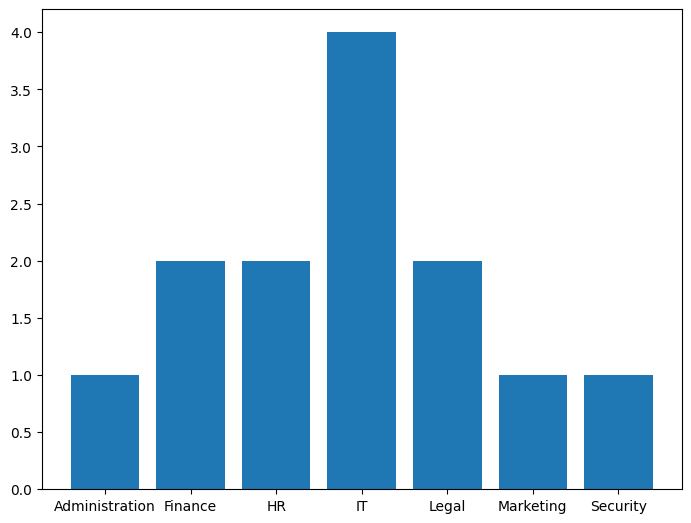

In [46]:
# Visualizing number of employees in each department
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
department = graph_data.keys()
employee = graph_data.values()
ax.bar(department, employee)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

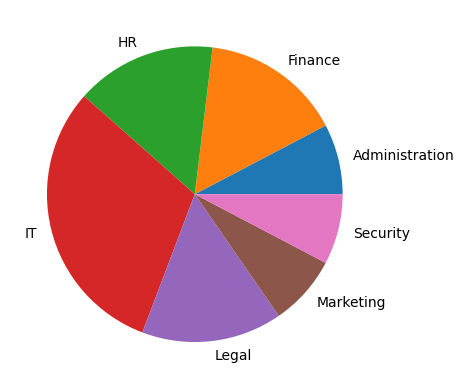

In [48]:
plt.pie(employee, labels=department)
plt.show

In [51]:
# Visualizing number of male and female employees
gender = df.groupby(['gender']).size()
gender

gender
Female     2
Male      11
dtype: int64

In [52]:
graph_gender = gender.to_dict()

In [53]:
graph_gender.keys()

dict_keys(['Female', 'Male'])

In [54]:
graph_gender.values()

dict_values([2, 11])

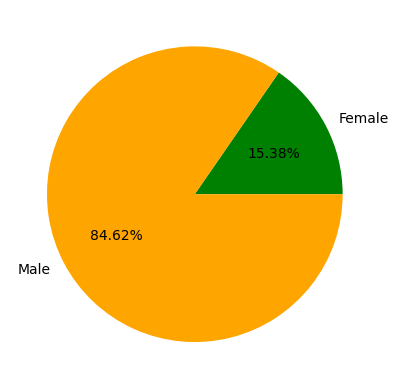

In [56]:
gender_number = graph_gender.values()
gender_labels = graph_gender.keys()
colors = ['green', 'orange']

plt.pie(gender_number, labels=gender_labels, colors=colors, autopct='%1.2f%%')
plt.show()